## Fetch Bitcoin Data

In [1]:
# import libraries
from binance import Client
import csv
import pandas as pd
from datetime import datetime as dt
import pandas_ta as ta
import numpy as np

In [2]:
# create client object from binance library
client = Client(None, None)

In [3]:
# defining the function that fetch the historical data of the wanted coin
def getdata(symbol, period, start, end):
    """
    This function gives us the historical candle data of the desired coin
    :param symbol: coin name that you want to get data
    :param period: time period of candles
    :param start: starting date of candles data
    :param end: end date of candles data
    :return: candles data
    """
    candles = client.get_historical_klines(symbol, period, start, end)
    return candles

In [4]:
# defining the function that make csv file of the historical data of the wanted coin
def make_csv(symbol, candles):
    """
    This function makes csv file of desired coin with defined properties
    :param symbol: coin name that you want to make csv file
    :param candles: historical data of the desired coin
    :return: historical data in csv file
    """
    csvfile = open(symbol + ".csv", "a", newline="")
    cursor = csv.writer(csvfile)
    for i in candles:
        cursor.writerow(i)
    csvfile.close()

In [5]:
# defining the function that make csv files of the historical data of the wanted multiple coin
def multiple_csv(symbols, interval, start, end):
    """
    This function makes csv file for each coin in symbols parameter with defined properties
    :param symbols: list of multiple coin names that you want to make csv file
    :param interval: time period of candles (default: client.KLINE_INTERVAL_1DAY you can change the interval)
    :param start: starting date of candles data
    :param end: end date of candles data
    :return: historical data of multiple coin in csv files
    """
    for i in symbols:
        make_csv(i, getdata(i, interval, str(start), str(end)))
        print(i, "csv file is ready.")

In [6]:
# defining function the that turn the timestamp to the date 
def calculate_time(timestamp):
    """
    This function turns the timestamp to the date
    :param timestamp: given timestamp
    :return: date according to given timestamp
    """
    return dt.fromtimestamp(timestamp/1000)

In [7]:
# get Bitcoin historical data and make csv
multiple_csv(["BTCUSDT"], client.KLINE_INTERVAL_1DAY, "8 November 2022", "30 April 2023")

BTCUSDT csv file is ready.


In [8]:
# read Bitcoin histroical data as dataframe with column names
headers = ["Open Time", "Open", "High", "Low", "Close", "Volume", "Close Time", "QAV", "NAT", "TBBAV", "TBQAV", "Ignore"]
data = pd.read_csv("BTCUSDT.csv", names=headers)
data.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,NAT,TBBAV,TBQAV,Ignore
0,1502928000000,4261.48,4485.39,4200.74,4285.08,795.150377,1503014399999,3.454770e+06,3427,616.248541,2.678216e+06,0
1,1503014400000,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,5.086958e+06,5233,972.868710,4.129123e+06,0
2,1503100800000,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,1.549484e+06,2153,274.336042,1.118002e+06,0
3,1503187200000,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,1.930364e+06,2321,376.795947,1.557401e+06,0
4,1503273600000,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2.797232e+06,3972,557.356107,2.255663e+06,0


## Preprocessing

In [9]:
# Turn "Open Time" and "Close Time" columns to Date
open_date = []
for i in data["Open Time"]:
    open_date.append(calculate_time(i))
data["Open Time"] = open_date

close_date = []
for i in data["Close Time"]:
    close_date.append(calculate_time(i))
data["Close Time"] = close_date
data.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,NAT,TBBAV,TBQAV,Ignore
0,2017-08-17 03:00:00,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-18 02:59:59.999,3.454770e+06,3427,616.248541,2.678216e+06,0
1,2017-08-18 03:00:00,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-19 02:59:59.999,5.086958e+06,5233,972.868710,4.129123e+06,0
2,2017-08-19 03:00:00,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-20 02:59:59.999,1.549484e+06,2153,274.336042,1.118002e+06,0
3,2017-08-20 03:00:00,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-21 02:59:59.999,1.930364e+06,2321,376.795947,1.557401e+06,0
4,2017-08-21 03:00:00,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-22 02:59:59.999,2.797232e+06,3972,557.356107,2.255663e+06,0


In [10]:
# make a label column according to Close and Open price
# if Open > Close 0, Close > Open 1
label = []
for i in range(len(data["Open"])):
    if data["Open"][i] > data["Close"][i]:
        label.append(0)
    if data["Open"][i] < data["Close"][i]:
        label.append(1)
    if data["Open"][i] == data["Close"][i]:
        label.append(0)

In [11]:
# check label size
len(label)

1879

In [12]:
# add label column to the ıgnore column and change ıgnore name --> label
data["Ignore"] = label
data.rename(columns = {'Ignore':'Label'}, inplace = True)
data.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,NAT,TBBAV,TBQAV,Label
0,2017-08-17 03:00:00,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-18 02:59:59.999,3.454770e+06,3427,616.248541,2.678216e+06,1
1,2017-08-18 03:00:00,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-19 02:59:59.999,5.086958e+06,5233,972.868710,4.129123e+06,0
2,2017-08-19 03:00:00,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-20 02:59:59.999,1.549484e+06,2153,274.336042,1.118002e+06,1
3,2017-08-20 03:00:00,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-21 02:59:59.999,1.930364e+06,2321,376.795947,1.557401e+06,0
4,2017-08-21 03:00:00,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-22 02:59:59.999,2.797232e+06,3972,557.356107,2.255663e+06,0


In [13]:
# calculate rsi and add to the dataframe as column
rsi = ta.rsi(data["Close"], 14)
data["Close Time"] = rsi
data.rename(columns = {'Close Time':'Rsi'}, inplace = True)
data.tail()

,Open Time,Open,High,Low,Close,Volume,Rsi,QAV,NAT,TBBAV,TBQAV,Label
1874,2022-10-04 03:00:00,19629.08,20475.00,19490.60,20337.82,327012.00127,55.724089,6.533428e+09,4871932,165646.26490,3.309936e+09,1
1875,2022-10-05 03:00:00,20337.82,20365.60,19730.00,20158.26,312239.75224,53.887588,6.275437e+09,4540004,155249.45329,3.120339e+09,0
1876,2022-10-06 03:00:00,20158.26,20456.60,19853.00,19960.67,320122.17020,51.862062,6.452892e+09,5085004,161557.89851,3.256881e+09,0
1877,2022-10-07 03:00:00,19960.67,20068.82,19320.00,19530.09,220874.83913,47.658094,4.353681e+09,4324772,109800.49576,2.164491e+09,0
1878,2022-10-08 03:00:00,19530.09,19627.38,19237.14,19417.96,102480.09842,46.598751,1.995917e+09,2637385,50775.11492,9.889528e+08,0


In [14]:
# calculate ema20,50,100,200 and add to the dataframe
ema20 = ta.ma("ema", data["Close"], length=20)
ema50 = ta.ma("ema", data["Close"], length=50)
ema100 = ta.ma("ema", data["Close"], length=100)
ema200 = ta.ma("ema", data["Close"], length=200)

data["QAV"] = ema20
data.rename(columns = {'QAV':'Ema20'}, inplace = True)

data["NAT"] = ema50
data.rename(columns = {'NAT':'Ema50'}, inplace = True)

data["TBBAV"] = ema100
data.rename(columns = {'TBBAV':'Ema100'}, inplace = True)

data["TBQAV"] = ema200
data.rename(columns = {'TBQAV':'Ema200'}, inplace = True)
data.tail()

,Open Time,Open,High,Low,Close,Volume,Rsi,Ema20,Ema50,Ema100,Ema200,Label
1874,2022-10-04 03:00:00,19629.08,20475.00,19490.60,20337.82,327012.00127,55.724089,19592.591856,20325.760772,22204.386717,26808.895223,1
1875,2022-10-05 03:00:00,20337.82,20365.60,19730.00,20158.26,312239.75224,53.887588,19646.465013,20319.192115,22163.869357,26742.719749,0
1876,2022-10-06 03:00:00,20158.26,20456.60,19853.00,19960.67,320122.17020,51.862062,19676.389297,20305.132424,22120.241646,26675.236667,0
1877,2022-10-07 03:00:00,19960.67,20068.82,19320.00,19530.09,220874.83913,47.658094,19662.456031,20274.738603,22068.951515,26604.140680,0
1878,2022-10-08 03:00:00,19530.09,19627.38,19237.14,19417.96,102480.09842,46.598751,19639.170695,20241.139442,22016.456633,26532.636394,0


In [15]:
# calculate sma50,200 and wma20,100  and add to the dataframe
sma50 = ta.ma("sma", data["Close"], length=50)
sma200 = ta.ma("sma", data["Close"], length=200)

wma20 = ta.ma("wma", data["Close"], length=20)
wma100 = ta.ma("wma", data["Close"], length=100)

data["Sma50"] = sma50
data["Sma200"] = sma200
data["Wma20"] = wma20
data["wma100"] = wma100
data.tail()

,Open Time,Open,High,Low,Close,Volume,Rsi,Ema20,Ema50,Ema100,Ema200,Label,Sma50,Sma200,Wma20,wma100
1874,2022-10-04 03:00:00,19629.08,20475.00,19490.60,20337.82,327012.00127,55.724089,19592.591856,20325.760772,22204.386717,26808.895223,1,20237.1930,27827.79780,19374.195143,20774.170448
1875,2022-10-05 03:00:00,20337.82,20365.60,19730.00,20158.26,312239.75224,53.887588,19646.465013,20319.192115,22163.869357,26742.719749,0,20163.2634,27717.58345,19449.285048,20754.806964
1876,2022-10-06 03:00:00,20158.26,20456.60,19853.00,19960.67,320122.17020,51.862062,19676.389297,20305.132424,22120.241646,26675.236667,0,20095.6236,27611.07625,19503.383619,20731.646511
1877,2022-10-07 03:00:00,19960.67,20068.82,19320.00,19530.09,220874.83913,47.658094,19662.456031,20274.738603,22068.951515,26604.140680,0,20022.4014,27503.71545,19515.725190,20700.023210
1878,2022-10-08 03:00:00,19530.09,19627.38,19237.14,19417.96,102480.09842,46.598751,19639.170695,20241.139442,22016.456633,26532.636394,0,19994.0728,27388.98460,19520.166429,20666.296923


In [16]:
# drop "Open Time" Column and "Label" column
data.drop(["Open Time", "Label"], axis=1, inplace=True)

In [17]:
# see datashape
data.shape

(1879, 14)

In [18]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1879 non-null   float64
 1   High    1879 non-null   float64
 2   Low     1879 non-null   float64
 3   Close   1879 non-null   float64
 4   Volume  1879 non-null   float64
 5   Rsi     1865 non-null   float64
 6   Ema20   1860 non-null   float64
 7   Ema50   1830 non-null   float64
 8   Ema100  1780 non-null   float64
 9   Ema200  1680 non-null   float64
 10  Sma50   1830 non-null   float64
 11  Sma200  1680 non-null   float64
 12  Wma20   1860 non-null   float64
 13  wma100  1780 non-null   float64
dtypes: float64(14)
memory usage: 205.6 KB


In [19]:
# there are some missing values in the dataset let's fill in the missing data according to the column mean
misrsi = np.round(np.mean(data.Rsi), 2)
print(f"Rsi Mean: {misrsi}")
data["Rsi"] = data["Rsi"].fillna(misrsi)
data.info()

Rsi Mean: 51.66
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1879 non-null   float64
 1   High    1879 non-null   float64
 2   Low     1879 non-null   float64
 3   Close   1879 non-null   float64
 4   Volume  1879 non-null   float64
 5   Rsi     1879 non-null   float64
 6   Ema20   1860 non-null   float64
 7   Ema50   1830 non-null   float64
 8   Ema100  1780 non-null   float64
 9   Ema200  1680 non-null   float64
 10  Sma50   1830 non-null   float64
 11  Sma200  1680 non-null   float64
 12  Wma20   1860 non-null   float64
 13  wma100  1780 non-null   float64
dtypes: float64(14)
memory usage: 205.6 KB


In [20]:
# we can fill the other columns with same strategy
#Ema20
misema20 = np.round(np.mean(data.Ema20), 2)
print(f"Ema20 Mean: {misema20}")
data["Ema20"] = data["Ema20"].fillna(misema20)

#Ema50
misema50 = np.round(np.mean(data.Ema50), 2)
print(f"Ema50 Mean: {misema50}")
data["Ema50"] = data["Ema50"].fillna(misema50)

#Ema100
misema100 = np.round(np.mean(data.Ema100), 2)
print(f"Ema100 Mean: {misema100}")
data["Ema100"] = data["Ema100"].fillna(misema100)

#Ema200
misema200 = np.round(np.mean(data.Ema200), 2)
print(f"Ema200 Mean: {misema200}")
data["Ema200"] = data["Ema200"].fillna(misema200)

#Sma50
missma50 = np.round(np.mean(data.Sma50), 2)
print(f"Sma50 Mean: {missma50}")
data["Sma50"] = data["Sma50"].fillna(missma50)

#Sma100
missma100 = np.round(np.mean(data.Sma200), 2)
print(f"Sma100 Mean: {missma100}")
data["Sma200"] = data["Sma200"].fillna(missma100)

#Wma20
miswma20 = np.round(np.mean(data.Wma20), 2)
print(f"Wma20 Mean: {miswma20}")
data["Wma20"] = data["Wma20"].fillna(miswma20)

#Wma20
miswma100 = np.round(np.mean(data.wma100), 2)
print(f"Wma100 Mean: {miswma100}")
data["wma100"] = data["wma100"].fillna(miswma100)
data.info()

Ema20 Mean: 19573.21
Ema50 Mean: 19691.84
Ema100 Mean: 19822.0
Ema200 Mean: 19715.83
Sma50 Mean: 19698.23
Sma100 Mean: 20028.38
Wma20 Mean: 19599.78
Wma100 Mean: 20031.62
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1879 non-null   float64
 1   High    1879 non-null   float64
 2   Low     1879 non-null   float64
 3   Close   1879 non-null   float64
 4   Volume  1879 non-null   float64
 5   Rsi     1879 non-null   float64
 6   Ema20   1879 non-null   float64
 7   Ema50   1879 non-null   float64
 8   Ema100  1879 non-null   float64
 9   Ema200  1879 non-null   float64
 10  Sma50   1879 non-null   float64
 11  Sma200  1879 non-null   float64
 12  Wma20   1879 non-null   float64
 13  wma100  1879 non-null   float64
dtypes: float64(14)
memory usage: 205.6 KB


In [21]:
data

,Open,High,Low,Close,Volume,Rsi,Ema20,Ema50,Ema100,Ema200,Sma50,Sma200,Wma20,wma100
0,4261.48,4485.39,4200.74,4285.08,795.150377,51.660000,19573.210000,19691.840000,19822.000000,19715.830000,19698.2300,20028.38000,19599.780000,20031.620000
1,4285.08,4371.52,3938.77,4108.37,1199.888264,51.660000,19573.210000,19691.840000,19822.000000,19715.830000,19698.2300,20028.38000,19599.780000,20031.620000
2,4108.37,4184.69,3850.00,4139.98,381.309763,51.660000,19573.210000,19691.840000,19822.000000,19715.830000,19698.2300,20028.38000,19599.780000,20031.620000
3,4120.98,4211.08,4032.62,4086.29,467.083022,51.660000,19573.210000,19691.840000,19822.000000,19715.830000,19698.2300,20028.38000,19599.780000,20031.620000
4,4069.13,4119.62,3911.79,4016.00,691.743060,51.660000,19573.210000,19691.840000,19822.000000,19715.830000,19698.2300,20028.38000,19599.780000,20031.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,19629.08,20475.00,19490.60,20337.82,327012.001270,55.724089,19592.591856,20325.760772,22204.386717,26808.895223,20237.1930,27827.79780,19374.195143,20774.170448
1875,20337.82,20365.60,19730.00,20158.26,312239.752240,53.887588,19646.465013,20319.192115,22163.869357,26742.719749,20163.2634,27717.58345,19449.285048,20754.806964
1876,20158.26,20456.60,19853.00,19960.67,320122.170200,51.862062,19676.389297,20305.132424,22120.241646,26675.236667,20095.6236,27611.07625,19503.383619,20731.646511
1877,19960.67,20068.82,19320.00,19530.09,220874.839130,47.658094,19662.456031,20274.738603,22068.951515,26604.140680,20022.4014,27503.71545,19515.725190,20700.023210


## Data Analysis

In [22]:
# after we fill all the missing values see statistical info
data.describe() 

,Open,High,Low,Close,Volume,Rsi,Ema20,Ema50,Ema100,Ema200,Sma50,Sma200,Wma20,wma100
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,19488.329228,20045.309010,18848.970532,19496.469691,60382.087477,51.663352,19573.211441,19691.835434,19821.996780,19715.832152,19698.225867,20028.383052,19599.775523,20031.618990
std,17098.411662,17568.920613,16550.489256,17094.868248,58164.490317,14.005502,16903.322316,16562.189873,15995.064332,14992.289331,16735.866086,15515.895048,16966.625760,16384.509315
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,10.497797,3500.410645,3678.001925,4013.696095,4623.713840,3619.334600,4435.787850,3469.689381,3659.121671
25%,7199.265000,7394.650000,7008.545000,7200.430000,29686.974364,41.876502,7274.516893,7563.407535,8030.586547,8142.789679,7515.876200,8143.339025,7244.828381,7869.691377
50%,10227.780000,10450.000000,9890.000000,10237.510000,45690.912540,50.484249,10299.170379,10434.790660,10297.490775,9850.509642,10453.472000,10173.669750,10311.594905,10722.456444
75%,32847.870000,34022.525000,31225.620000,32847.865000,70159.076114,60.686429,33566.158761,34389.700765,35050.765266,34170.249643,34542.825700,33808.271800,33706.196024,35460.975211
max,67525.820000,69000.000000,66222.400000,67525.830000,593260.741610,93.460719,63164.961906,59111.683014,54988.843251,50093.893665,60819.455400,49423.710450,63902.237476,57536.613960


In [23]:
import matplotlib.pyplot as plt
# data visualization 
def plotHistogram(column):
    """
        input: Column name
        Output: Histogram Plot
    """
    
    plt.figure()
    plt.hist(data[column], bins = 85, color = "orange")
    plt.xlabel(column)
    plt.ylabel("Frekans")
    plt.title(f"Data Frequency - {column}")
    plt.show()

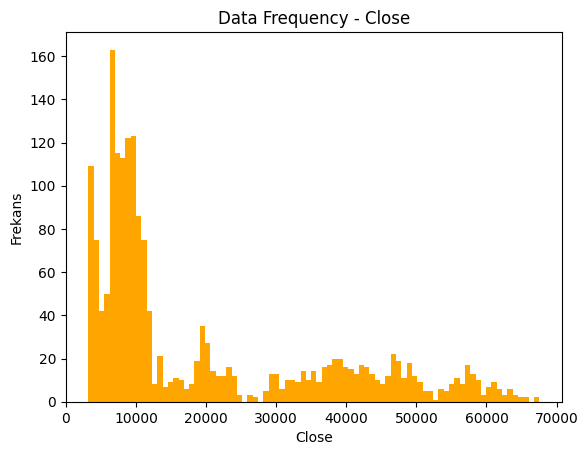

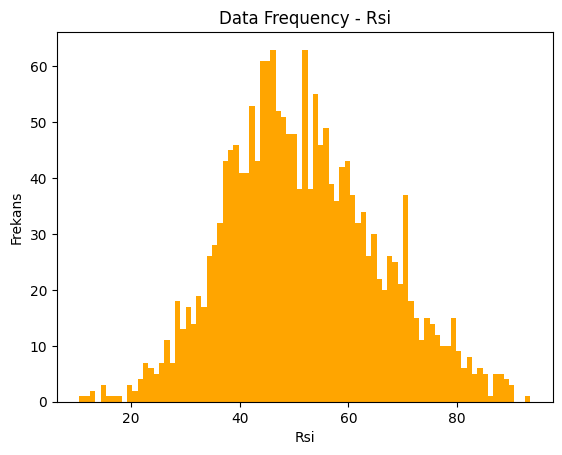

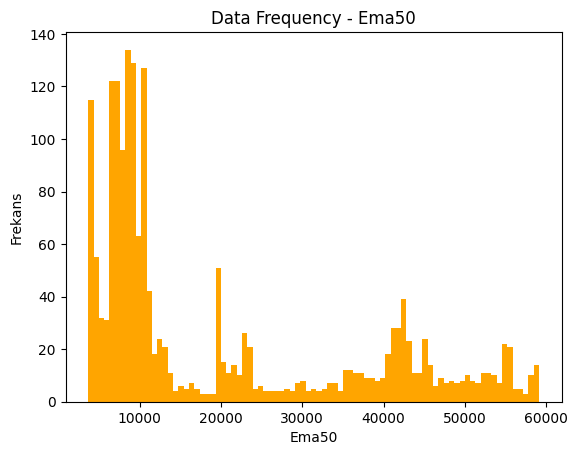

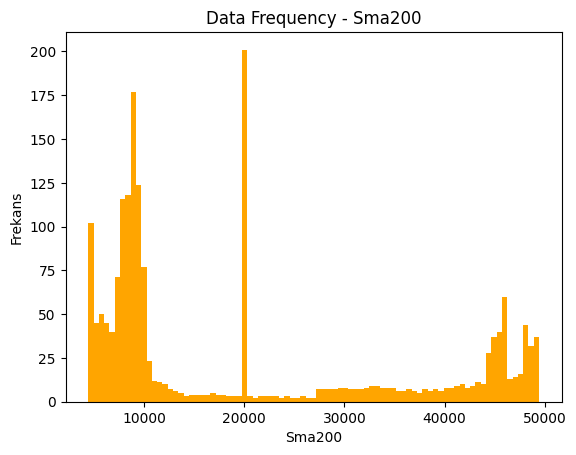

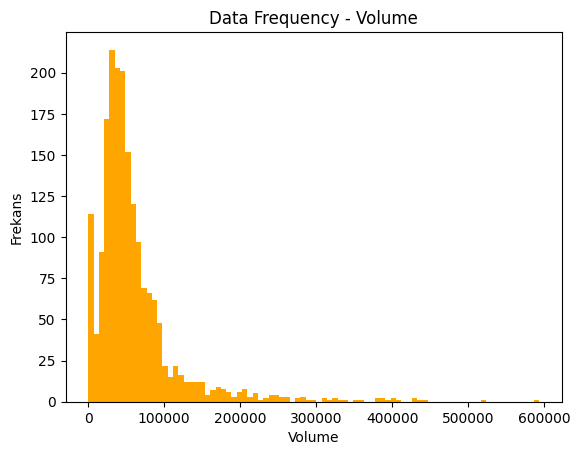

In [24]:
# visualization of some columns
columns = ["Close", "Rsi", "Ema50", "Sma200", "Volume"]
for i in columns:
    plotHistogram(i)

In [25]:
# see corelation table 
data.loc[:,["Close", "Volume", "Rsi", "Ema20", "wma100"]].corr()

,Close,Volume,Rsi,Ema20,wma100
Close,1.000000,0.151782,0.040296,0.987640,0.937215
Volume,0.151782,1.000000,-0.082355,0.155247,0.135816
Rsi,0.040296,-0.082355,1.000000,-0.051048,-0.128773
Ema20,0.987640,0.155247,-0.051048,1.000000,0.963487
wma100,0.937215,0.135816,-0.128773,0.963487,1.000000


In [26]:
# add label column to the dataframe for some scatter plot
data["Label"] = label

In [27]:
# Volume and Close Comparison according to sell and buy
sell = data[data.Label == 0]
sell.head(1)

,Open,High,Low,Close,Volume,Rsi,Ema20,Ema50,Ema100,Ema200,Sma50,Sma200,Wma20,wma100,Label
1,4285.08,4371.52,3938.77,4108.37,1199.888264,51.66,19573.21,19691.84,19822.0,19715.83,19698.23,20028.38,19599.78,20031.62,0


In [28]:
buy = data[data.Label == 1]
buy.head(1)

,Open,High,Low,Close,Volume,Rsi,Ema20,Ema50,Ema100,Ema200,Sma50,Sma200,Wma20,wma100,Label
0,4261.48,4485.39,4200.74,4285.08,795.150377,51.66,19573.21,19691.84,19822.0,19715.83,19698.23,20028.38,19599.78,20031.62,1


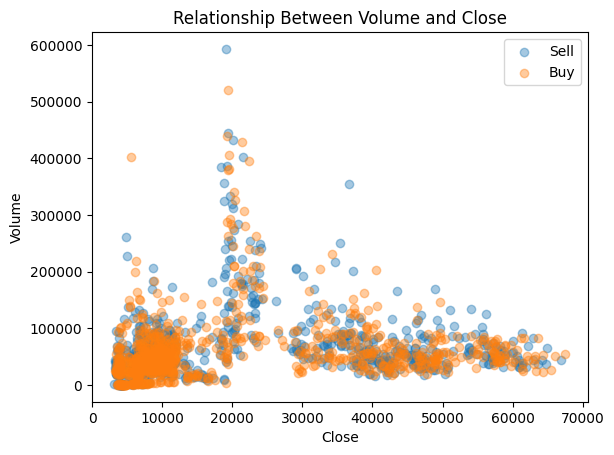

In [29]:
# See volume and close relation
plt.figure()
plt.scatter(sell.Close, sell.Volume, alpha = 0.4, label = "Sell")
plt.scatter(buy.Close, buy.Volume, alpha = 0.4, label = "Buy")
plt.xlabel("Close")
plt.ylabel("Volume")
plt.title("Relationship Between Volume and Close")
plt.legend()
plt.show()

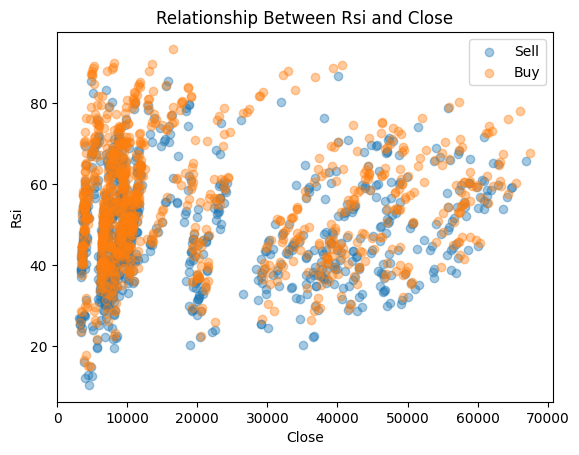

In [30]:
# See volume and close relation
plt.figure()
plt.scatter(sell.Close, sell.Rsi, alpha = 0.4, label = "Sell")
plt.scatter(buy.Close, buy.Rsi, alpha = 0.4, label = "Buy")
plt.xlabel("Close")
plt.ylabel("Rsi")
plt.title("Relationship Between Rsi and Close")
plt.legend()
plt.show()

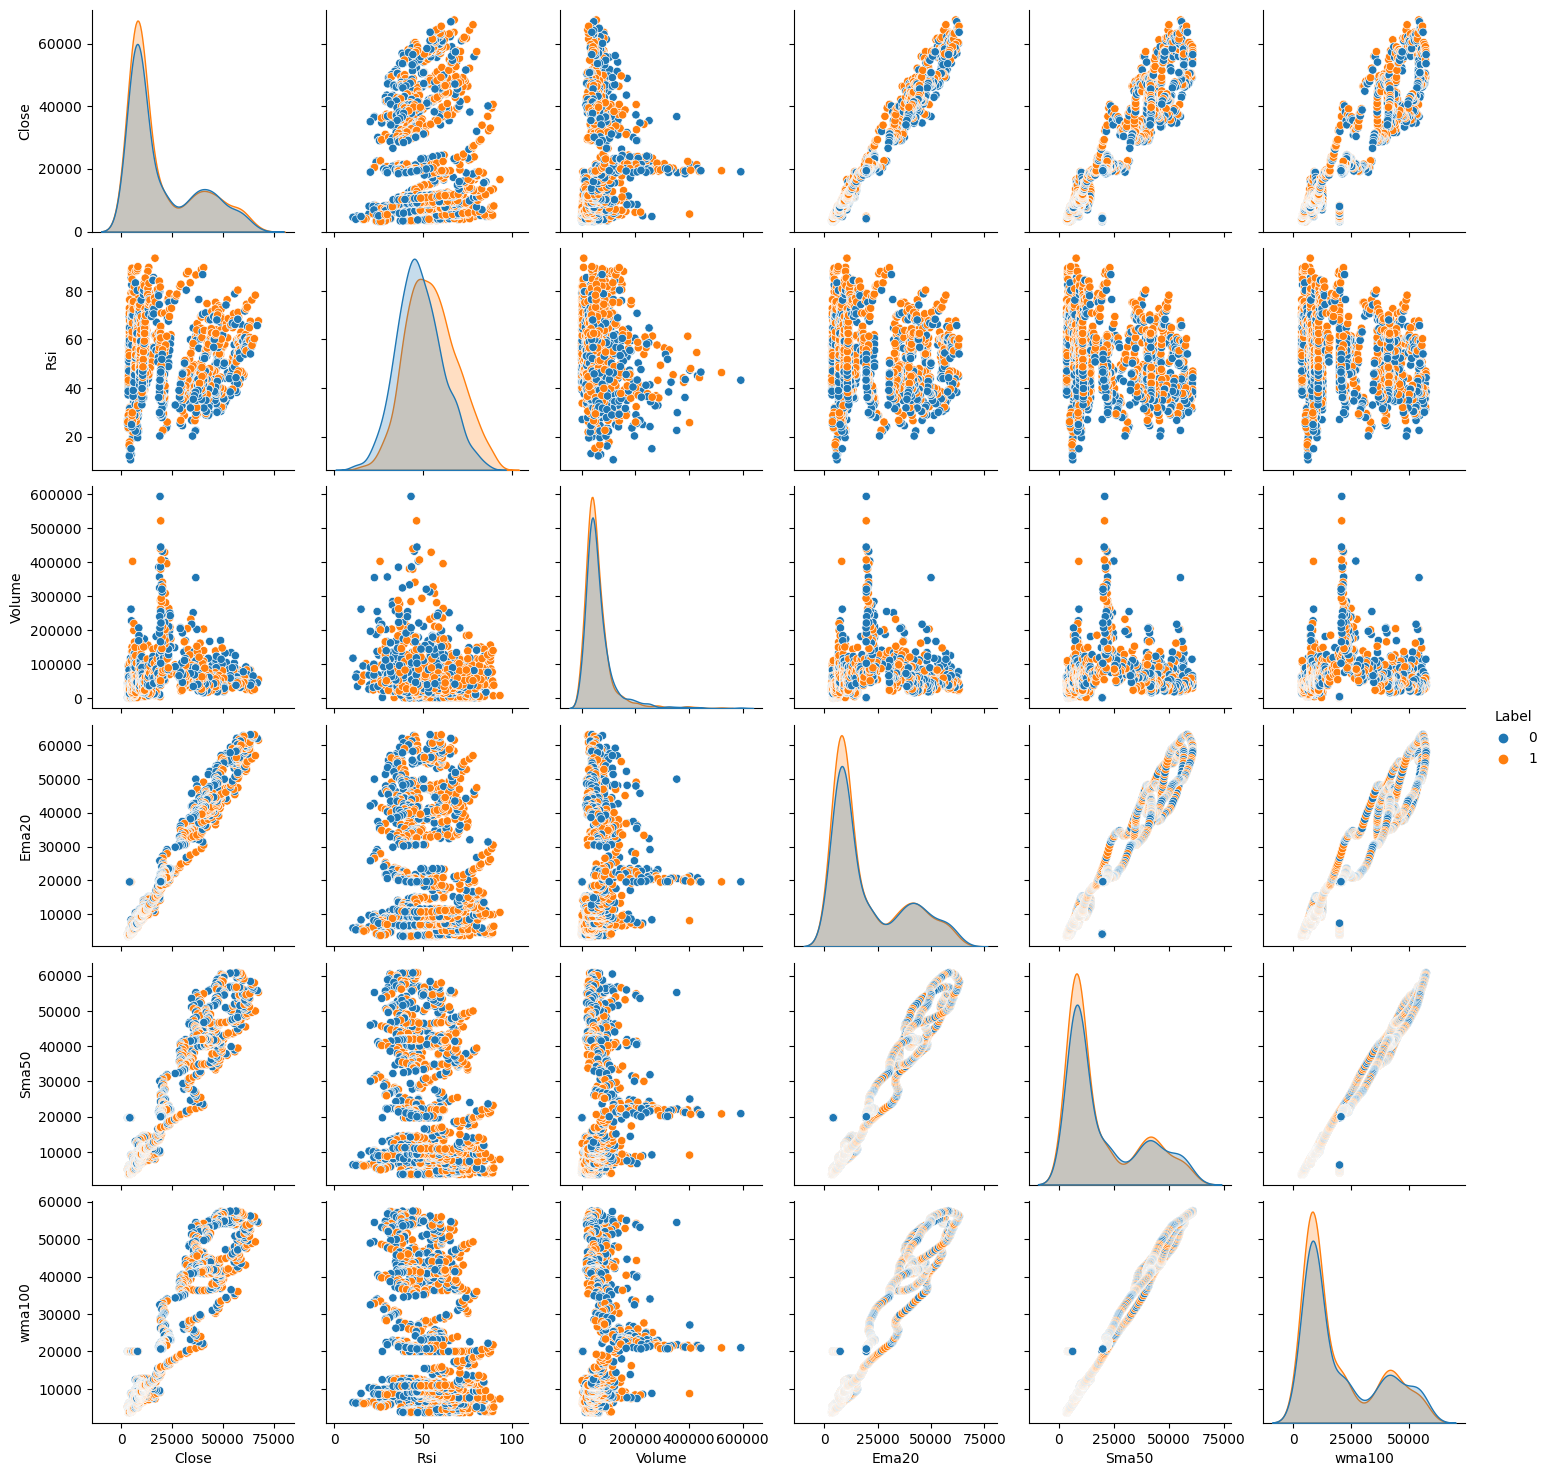

In [31]:
import seaborn as sns
# for Visualize the specific columns create a new dataframe 
pairdata = data[['Close', 'Rsi', 'Volume', "Ema20", "Sma50", "wma100", "Label"]].copy()
sns.pairplot(pairdata, hue='Label')

## Experimental Machine Learning 

In [32]:
# Creating Dependent and Independent Variables
X = data.drop("Label", axis=1)   # Independent
y = data["Label"]  # Dependent
print(f"input shape: {X.shape}, target shape: {y.shape}")

input shape: (1879, 14), target shape: (1879,)


In [33]:
# for train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 128)

In [34]:
# import classifiers
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# defining the function that multiple machine learning classifier include
def all_classifiers(X_train, X_test, y_train, y_test):
    """
    This function use multple machine learning classifier and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: accuracy score, classification report, confusion matrix for each classifier
    """
    
    # standardization of train and test data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # for Support Vector Machine Classifier
    print("*************************************************************************")
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    svm_train_predictions = svm_model.predict(X_train)
    svm_test_predictions = svm_model.predict(X_test)
    print('Train Accuracy Score for Support Vector Machine Model:', accuracy_score(svm_train_predictions, y_train))
    print("Test Accuracy Score for Support Vector Machine Model:", accuracy_score(svm_test_predictions, y_test))
    print(confusion_matrix(y_test, svm_test_predictions))
    print(classification_report(y_test, svm_test_predictions))
    
    
    # for Decision Tree Classifier
    print("*************************************************************************")
    decisiont_model = DecisionTreeClassifier()
    decisiont_model.fit(X_train, y_train)
    dt_train_predictions = decisiont_model.predict(X_train)
    dt_test_predictions = decisiont_model.predict(X_test)
    print('Train Accuracy Score for Decision Tree Model:', accuracy_score(dt_train_predictions, y_train))
    print("Test Accuracy Score for Decision Tree Model:", accuracy_score(dt_test_predictions, y_test))
    print(confusion_matrix(y_test, dt_test_predictions))
    print(classification_report(y_test, dt_test_predictions))
    
    
    # for GaussianNB Classifier
    print("*************************************************************************")
    gnb_model = GaussianNB()
    gnb_model.fit(X_train, y_train)
    gnb_train_predictions = gnb_model.predict(X_train)
    gnb_test_predictions = gnb_model.predict(X_test)
    print('Train Accuracy Score for GaussianNB Classifier:', accuracy_score(gnb_train_predictions, y_train))
    print("Test Accuracy Score for GaussianNB Classifier:", accuracy_score(gnb_test_predictions, y_test))
    print(confusion_matrix(y_test, gnb_test_predictions))
    print(classification_report(y_test, gnb_test_predictions))
    
    
    # for Bagging Classifier
    print("*************************************************************************")
    bag_model = BaggingClassifier()
    bag_model.fit(X_train, y_train)
    bag_train_predictions = bag_model.predict(X_train)
    bag_test_predictions = bag_model.predict(X_test)
    print('Train Accuracy Score for Bagging Classifier:', accuracy_score(bag_train_predictions, y_train))
    print("Test Accuracy Score for Bagging Classifier:", accuracy_score(bag_test_predictions, y_test))
    print(confusion_matrix(y_test, bag_test_predictions))
    print(classification_report(y_test, bag_test_predictions))

    
    # for Random Forest Classifier
    print("*************************************************************************")
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_train_predictions = rf_model.predict(X_train)
    rf_test_predictions = rf_model.predict(X_test)
    print('Train Accuracy Score for Random Forest Classifier:', accuracy_score(rf_train_predictions, y_train))
    print("Test Accuracy Score for Random Forest classifier:", accuracy_score(rf_test_predictions, y_test))
    print(confusion_matrix(y_test, rf_test_predictions))
    print(classification_report(y_test, rf_test_predictions))
    
    
    # for Ada Boost Classifier
    print("*************************************************************************")
    ada_model = AdaBoostClassifier()
    ada_model.fit(X_train, y_train)
    ada_train_predictions = ada_model.predict(X_train)
    ada_test_predictions = ada_model.predict(X_test)
    print('Train Accuracy Score for Ada Boost Classifier:', accuracy_score(ada_train_predictions, y_train))
    print("Test Accuracy Score Ada Boost Classifier:", accuracy_score(ada_test_predictions, y_test))
    print(confusion_matrix(y_test, ada_test_predictions))
    print(classification_report(y_test, ada_test_predictions))
    
    
    # for K-Neighbors Classifier
    print("*************************************************************************")
    kn_model = KNeighborsClassifier()
    kn_model.fit(X_train, y_train)
    kn_train_predictions = kn_model.predict(X_train)
    kn_test_predictions = kn_model.predict(X_test)
    print('Train Accuracy Score for K-Neighbors classifier:', accuracy_score(kn_train_predictions, y_train))
    print("Test Accuracy Score for K-Neighbors Classifier:", accuracy_score(kn_test_predictions, y_test))
    print(confusion_matrix(y_test, kn_test_predictions))
    print(classification_report(y_test, kn_test_predictions))
    
    
    # for Logistic Regression Classifier
    print("*************************************************************************")
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    lr_train_predictions = lr_model.predict(X_train)
    lr_test_predictions = lr_model.predict(X_test)
    print('Train Accuracy Score for Logistic Regression Classifier:', accuracy_score(lr_train_predictions, y_train))
    print("Test Accuracy Score for Logistic Regression Classifier:", accuracy_score(lr_test_predictions, y_test))
    print(confusion_matrix(y_test, lr_test_predictions))
    print(classification_report(y_test, lr_test_predictions))
    
    
    # for XGBoost Classifier
    print("*************************************************************************")
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)
    xgb_train_predictions = xgb_model.predict(X_train)
    xgb_test_predictions = xgb_model.predict(X_test)
    print('Train Accuracy Score for XGBoost Classifier:', accuracy_score(xgb_train_predictions, y_train))
    print("Test Accuracy Score for XGBoost Classifier:", accuracy_score(xgb_test_predictions, y_test))
    print(confusion_matrix(y_test, xgb_test_predictions))
    print(classification_report(y_test, xgb_test_predictions))
    print("*************************************************************************")
    
    print("----------------Summary----------------")
    print("SVM Test Accuracy:", accuracy_score(svm_test_predictions, y_test))
    print("Decision Tree Test Accuracy:", accuracy_score(dt_test_predictions, y_test))
    print("GaussianNB Test Accuracy:", accuracy_score(gnb_test_predictions, y_test))
    print("Bagging Test Accuracy:", accuracy_score(bag_test_predictions, y_test))
    print("Random Forest Test Accuracy:", accuracy_score(rf_test_predictions, y_test))
    print("Ada Boost Test Accuracy:", accuracy_score(ada_test_predictions, y_test))
    print("K-Neighbors Test Accuracy:", accuracy_score(kn_test_predictions, y_test))
    print("Logistic Regression Test Accuracy:", accuracy_score(lr_test_predictions, y_test))
    print("XGBoost Test Accuracy:", accuracy_score(xgb_test_predictions, y_test))

In [35]:
all_classifiers(X_train, X_test, y_train, y_test)

*************************************************************************
Train Accuracy Score for Support Vector Machine Model: 0.6234198270126414
Test Accuracy Score for Support Vector Machine Model: 0.5851063829787234
[[ 94  96]
 [ 60 126]]
              precision    recall  f1-score   support

           0       0.61      0.49      0.55       190
           1       0.57      0.68      0.62       186

    accuracy                           0.59       376
   macro avg       0.59      0.59      0.58       376
weighted avg       0.59      0.59      0.58       376

*************************************************************************
Train Accuracy Score for Decision Tree Model: 1.0
Test Accuracy Score for Decision Tree Model: 0.648936170212766
[[117  73]
 [ 59 127]]
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       190
           1       0.64      0.68      0.66       186

    accuracy                           0.65       376
 